In [2]:
import torch
from d2l import torch as d2l

In [5]:
X= torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0,keepdims=True), X.sum(1,keepdims=False)

(tensor([[5., 7., 9.]]), tensor([ 6., 15.]))

In [12]:
def softmax(X):
    X_exp = torch.exp(X)
    sum = X_exp.sum(1,keepdims=True)
    return X_exp/sum
#try
X = torch.rand((2,5))
X_prob= softmax(X)
X_prob

tensor([[0.1685, 0.1647, 0.2061, 0.2382, 0.2227],
        [0.2939, 0.1439, 0.1414, 0.2945, 0.1262]])

In [38]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self,num_inputs, num_outputs,lr,sigma=0.01) -> None:
        super().__init__()
        self.save_hyperparameters()
        self.W= torch.normal(0,sigma, size= (num_inputs, num_outputs), requires_grad=True)
        self.b= torch.zeros(num_outputs, requires_grad=True)
    def parameters(self):
        return[self.W,self.b]
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [31]:
y = torch.tensor([0,2,1])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5],[0.4,0.1,0.5]])
y_hat[[0,1,2],y]

tensor([0.1000, 0.5000, 0.1000])

In [39]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

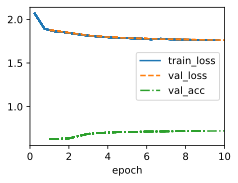

In [45]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

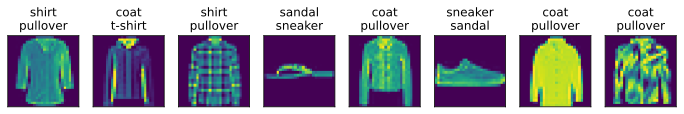

In [46]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)